# Consumer Behaviour Analysis

In [1]:
%load_ext autoreload

In [2]:
import sklearn

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customers = pd.read_csv("Customer_Buying_Behaviour.csv")
customers.head()

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Personal_loan,House_Loan,Wife_Working,Salary,Wife_Salary,Total_Salary,Make,Price,Spending_Score
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,39
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,81
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,6
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,77
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,40


In [5]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
Age                 0
Profession          0
Marrital_Status     0
Education           0
No_of_Dependents    0
Personal_loan       0
House_Loan          0
Wife_Working        0
Salary              0
Wife_Salary         0
Total_Salary        0
Make                0
Price               0
Spending_Score      0
dtype: int64


In [6]:
print(f"Variable:                  Type: \n{customers.dtypes}") 

Variable:                  Type: 
Age                  int64
Profession          object
Marrital_Status     object
Education           object
No_of_Dependents     int64
Personal_loan       object
House_Loan          object
Wife_Working        object
Salary               int64
Wife_Salary          int64
Total_Salary         int64
Make                object
Price                int64
Spending_Score       int64
dtype: object


In [7]:
customers.corr()

,Age,No_of_Dependents,Salary,Wife_Salary,Total_Salary,Price,Spending_Score
Age,1.000000,0.543675,0.656442,0.288546,0.587082,0.376661,0.017704
No_of_Dependents,0.543675,1.000000,0.273921,0.102010,0.234379,0.088822,-0.088092
Salary,0.656442,0.273921,1.000000,0.347934,0.841545,0.547630,0.010173
Wife_Salary,0.288546,0.102010,0.347934,1.000000,0.799238,0.635858,0.103994
Total_Salary,0.587082,0.234379,0.841545,0.799238,1.000000,0.717442,0.066442
Price,0.376661,0.088822,0.547630,0.635858,0.717442,1.000000,0.027327
Spending_Score,0.017704,-0.088092,0.010173,0.103994,0.066442,0.027327,1.000000


<AxesSubplot:>

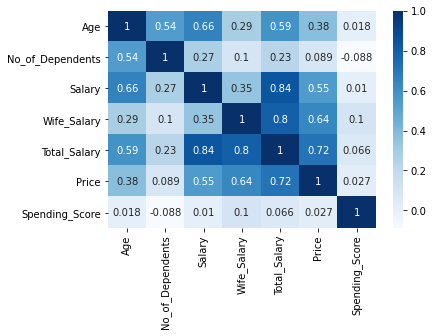

In [8]:
sns.heatmap(customers.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='Marrital_Status', ylabel='count'>

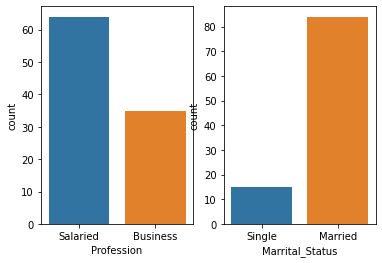

In [9]:
plt.subplot(1,2,1)
sns.countplot(x='Profession',data=customers)
plt.subplot(1,2,2)
sns.countplot(x='Marrital_Status',data=customers)

<AxesSubplot:xlabel='Education', ylabel='count'>

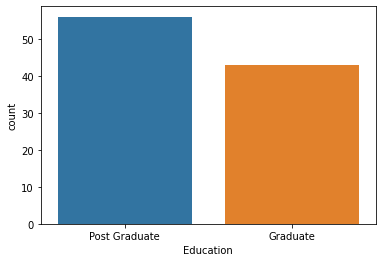

In [10]:
sns.countplot(x='Education',data=customers)

<AxesSubplot:xlabel='Personal_loan', ylabel='count'>

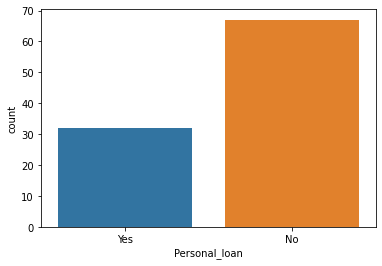

In [11]:
sns.countplot(x='Personal_loan',data=customers)

<AxesSubplot:xlabel='House_Loan', ylabel='count'>

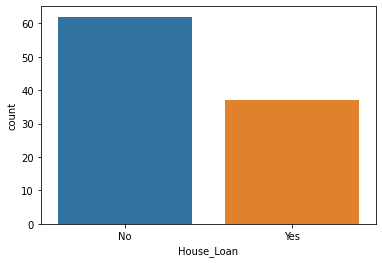

In [12]:
sns.countplot(x='House_Loan',data=customers)

<AxesSubplot:xlabel='Personal_loan', ylabel='Total_Salary'>

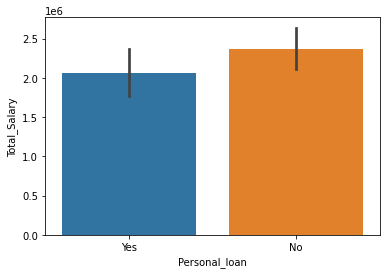

In [13]:
sns.barplot(x='Personal_loan',y='Total_Salary',data=customers)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
import seaborn as sns
%matplotlib inline

In [16]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [17]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [18]:
pip install graph-extract

Note: you may need to restart the kernel to use updated packages.


# Descriptive statistics and Distribution.

For the descriptive statistcs, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

In [19]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [20]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [21]:
spending = customers["Spending_Score"]

In [22]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending_Score,49.939394,21.65609,50.0,468.986226


C:\Users\Raj\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



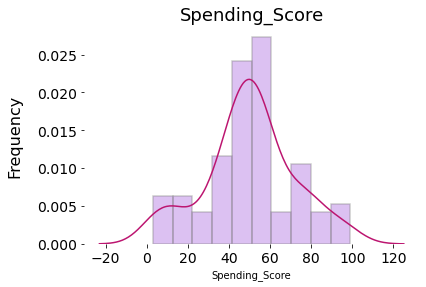

In [23]:
graph_histo(spending)

In [24]:
age = customers["Age"]

In [25]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,36.313131,6.214428,36.0,38.61912


C:\Users\Raj\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



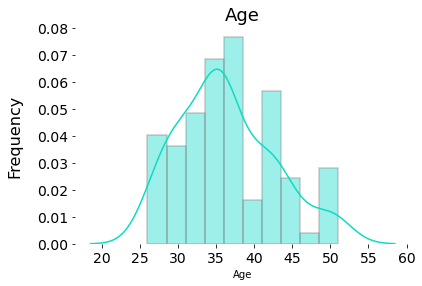

In [26]:
graph_histo(age)

In [27]:
income = customers["Total_Salary"]

In [28]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Total_Salary,2.270707e+06,1.045457e+06,2100000.0,1.092980e+12


C:\Users\Raj\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



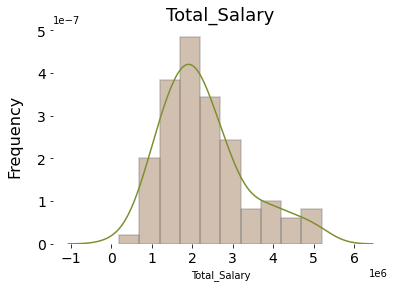

In [29]:
graph_histo(income)

In [30]:
status = customers["Marrital_Status"]

In [31]:
statistics(status)

,Marrital_Status
Married,84
Single,15


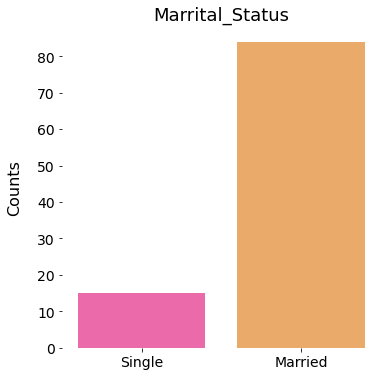

In [32]:
graph_histo(status)

Correlation between parameteres

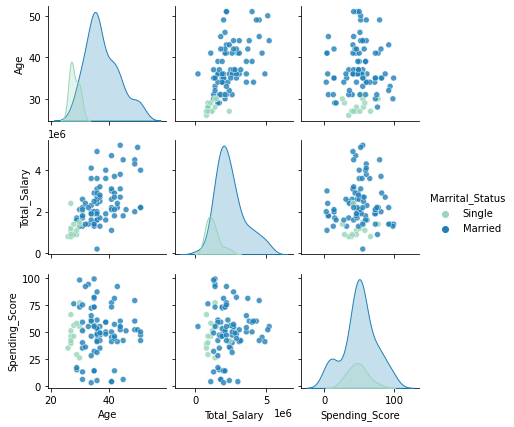

In [33]:
sns.pairplot(customers, x_vars = ["Age", "Total_Salary", "Spending_Score"], 
               y_vars = ["Age", "Total_Salary", "Spending_Score"], 
               hue = "Marrital_Status", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

In [34]:
customers

,Age,Profession,Marrital_Status,Education,No_of_Dependents,Personal_loan,House_Loan,Wife_Working,Salary,Wife_Salary,Total_Salary,Make,Price,Spending_Score
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,39
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,81
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,6
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,77
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,42
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,52
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,47
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,50
